# Clustering Techniques Comparison

## compares various clustering techniques on mall customer data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors
import warnings

In [2]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

# Option 1: Use the updated matplotlib style name
try:
    plt.style.use('seaborn-v0_8-whitegrid')  # For transitional versions
except:
    # Fallback to a default style with grid
    plt.style.use('default')
    plt.rcParams['axes.grid'] = True

# Option 2 (recommended): Use seaborn's own styling function
# sns.set_theme(style="whitegrid")

# Set the color palette
sns.set_palette("Set2")

In [3]:
# 1. Load and prepare the data
# ===========================

# Read the data
df = pd.read_csv('Datasets/mall.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

Dataset Shape: (200, 5)

First 5 rows:


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Check for missing values
print("\nMissing values:", df.isnull().sum().sum())


Missing values: 0


In [5]:
# Descriptive statistics
print("\nDescriptive Statistics:")
display(df.describe())


Descriptive Statistics:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# We'll use 'Annual Income' and 'Spending Score' for our clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [7]:
# Scaling the data (for fair comparison between different algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

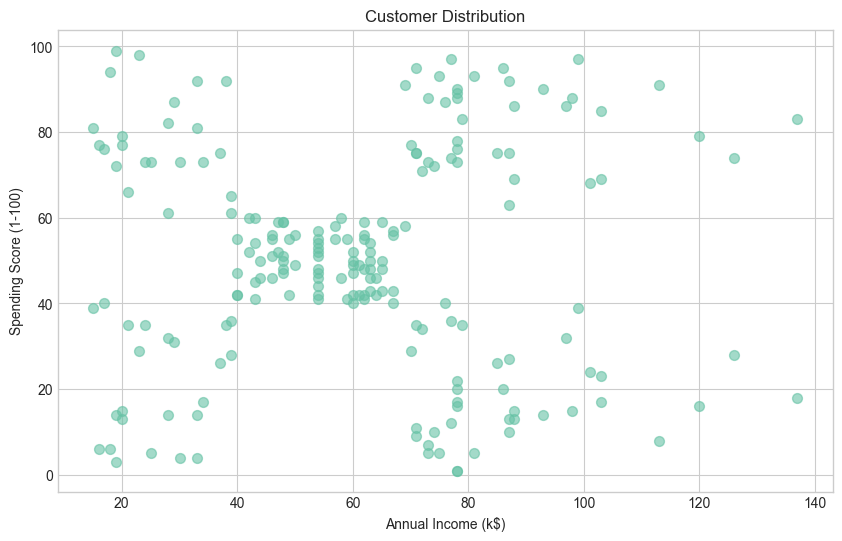

In [8]:
# 2. Data Visualization
# =====================

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.6, s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Distribution')
plt.grid(True)
plt.show()

In [9]:
# 3. Optimal number of clusters
# =============================

# Function to compute metrics for different values of k
def compute_metrics(X, k_range):
    results = {'k': [], 'inertia': [], 'silhouette': [], 'calinski_harabasz': [], 'davies_bouldin': []}
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        labels = kmeans.labels_
        
        results['k'].append(k)
        results['inertia'].append(kmeans.inertia_)
        
        if k > 1:  # Silhouette Score is not defined for k=1
            results['silhouette'].append(silhouette_score(X, labels))
            results['calinski_harabasz'].append(calinski_harabasz_score(X, labels))
            results['davies_bouldin'].append(davies_bouldin_score(X, labels))
        else:
            results['silhouette'].append(np.nan)
            results['calinski_harabasz'].append(np.nan)
            results['davies_bouldin'].append(np.nan)
    
    return pd.DataFrame(results)

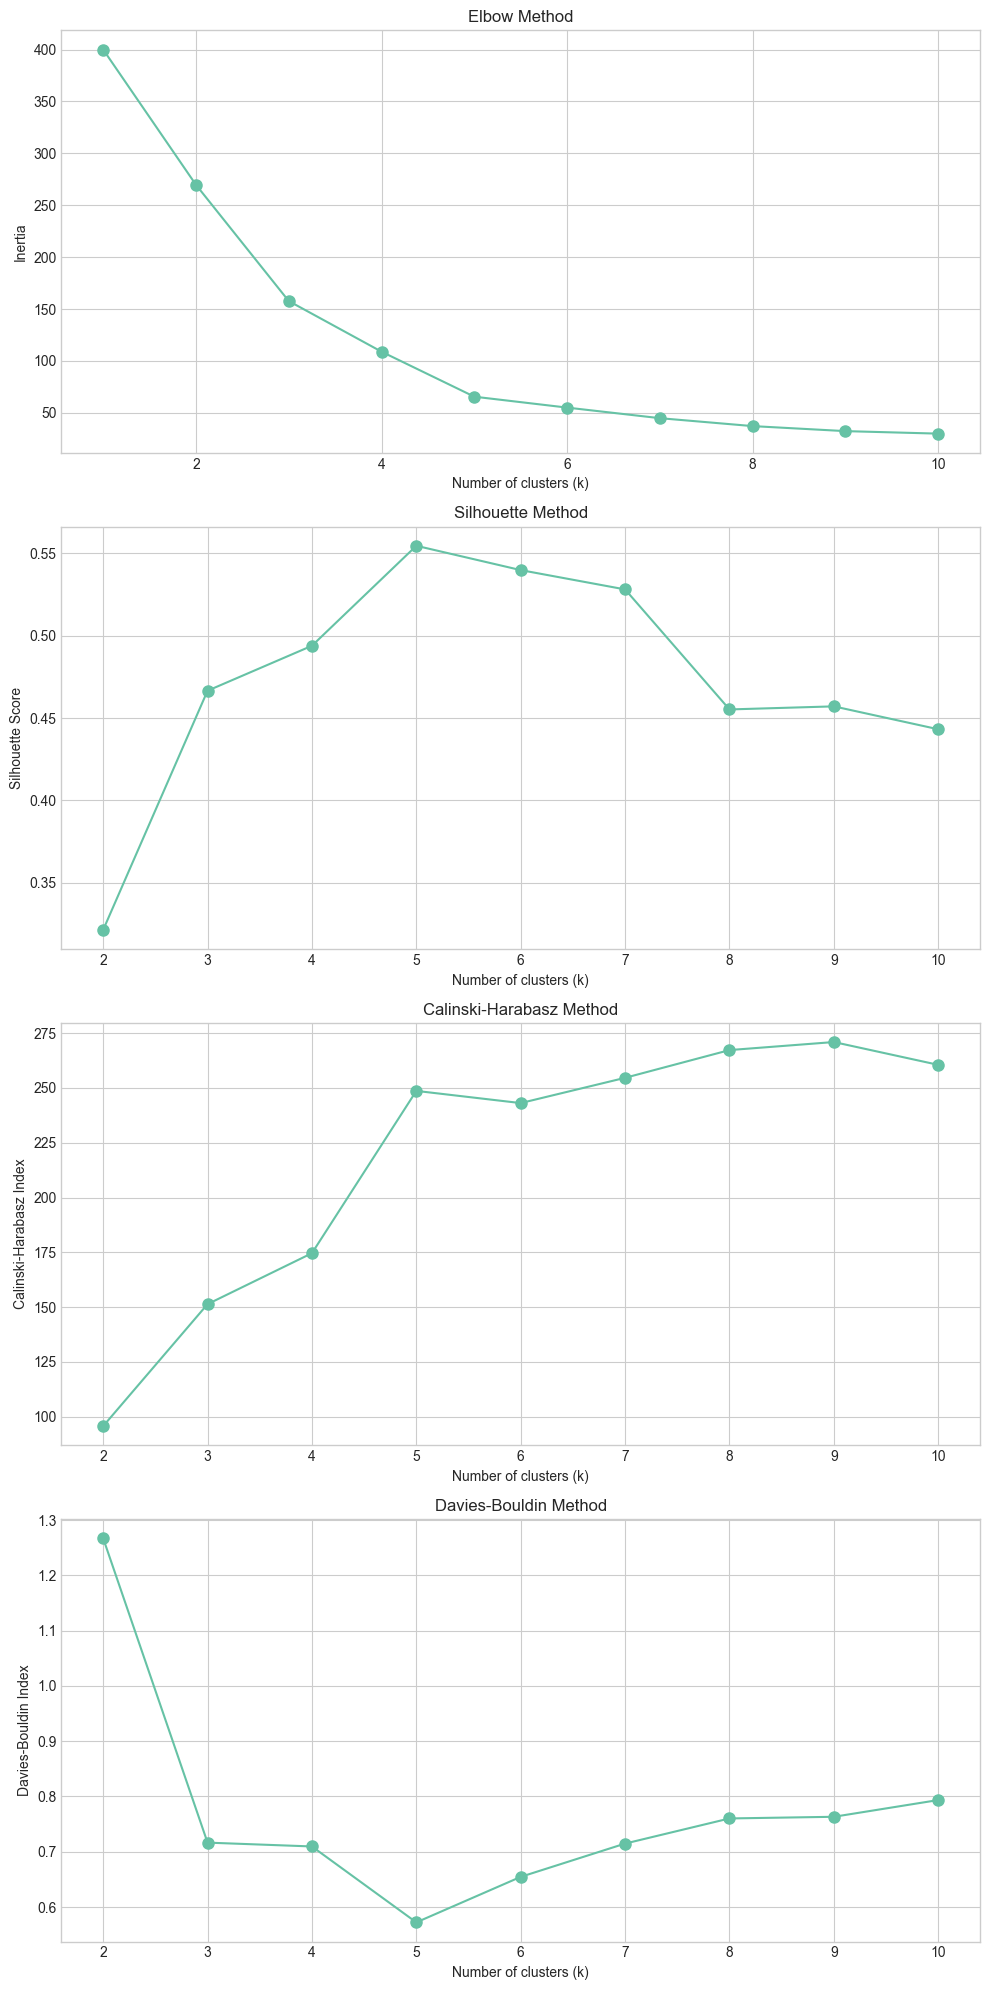

In [10]:
# Calculate metrics for different k values
k_range = range(1, 11)
metrics_df = compute_metrics(X_scaled, k_range)

# Plot the metrics
fig, axes = plt.subplots(4, 1, figsize=(10, 20))

# Elbow Method (Inertia)
axes[0].plot(metrics_df['k'], metrics_df['inertia'], 'o-', markersize=8)
axes[0].set_xlabel('Number of clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method')
axes[0].grid(True)

# Silhouette Score
axes[1].plot(metrics_df['k'][1:], metrics_df['silhouette'][1:], 'o-', markersize=8)
axes[1].set_xlabel('Number of clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Method')
axes[1].grid(True)

# Calinski-Harabasz Index
axes[2].plot(metrics_df['k'][1:], metrics_df['calinski_harabasz'][1:], 'o-', markersize=8)
axes[2].set_xlabel('Number of clusters (k)')
axes[2].set_ylabel('Calinski-Harabasz Index')
axes[2].set_title('Calinski-Harabasz Method')
axes[2].grid(True)

# Davies-Bouldin Index
axes[3].plot(metrics_df['k'][1:], metrics_df['davies_bouldin'][1:], 'o-', markersize=8)
axes[3].set_xlabel('Number of clusters (k)')
axes[3].set_ylabel('Davies-Bouldin Index')
axes[3].set_title('Davies-Bouldin Method')
axes[3].grid(True)

plt.tight_layout()
plt.show()

# Based on the results, we'll use 5 clusters for our comparison
n_clusters = 5

In [11]:
# 4. Implementing Different Clustering Techniques
# ==============================================

# 4.1 K-means
# -----------
kmeans = KMeans(n_clusters=n_clusters, random_state=42, init='k-means++', n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

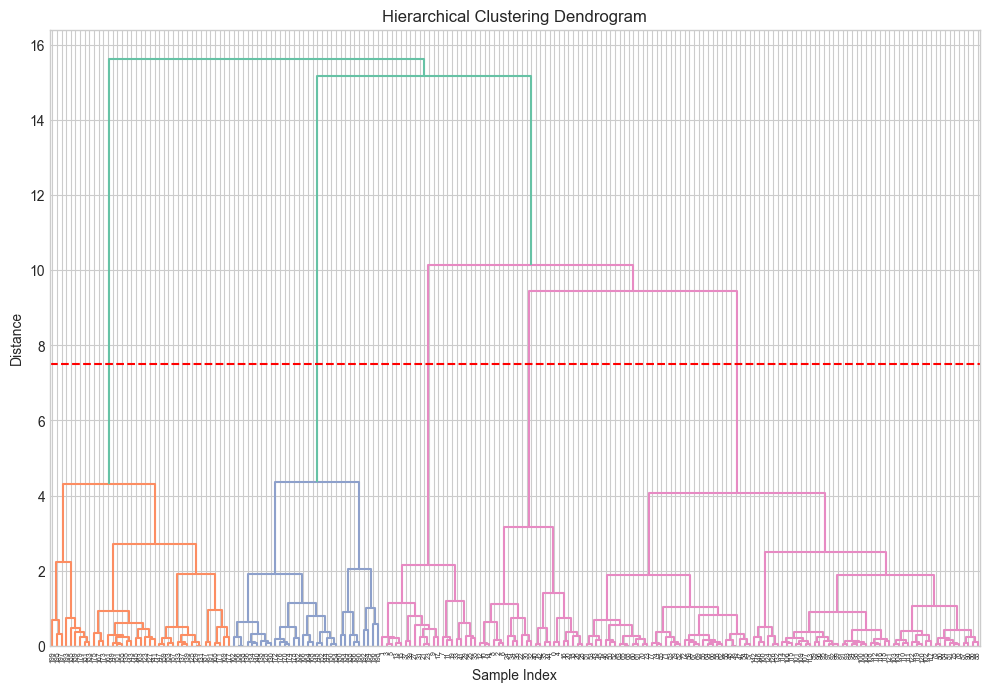

In [12]:
# 4.2 Hierarchical Agglomerative Clustering
# -----------------------------------------
hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# Visualize the dendrogram (for hierarchical clustering)
plt.figure(figsize=(12, 8))
dendrogram_plot = dendrogram(linkage(X_scaled, method='ward'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.axhline(y=7.5, color='r', linestyle='--')
plt.show()

In [13]:
# 4.3 Expectation Maximization (Gaussian Mixture Model)
# ----------------------------------------------------
gmm = GaussianMixture(n_components=n_clusters, random_state=42, covariance_type='full')
gmm_labels = gmm.fit_predict(X_scaled)

In [14]:
# 4.4 DBSCAN
# ----------
# Finding optimal eps parameter using nearest neighbors
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

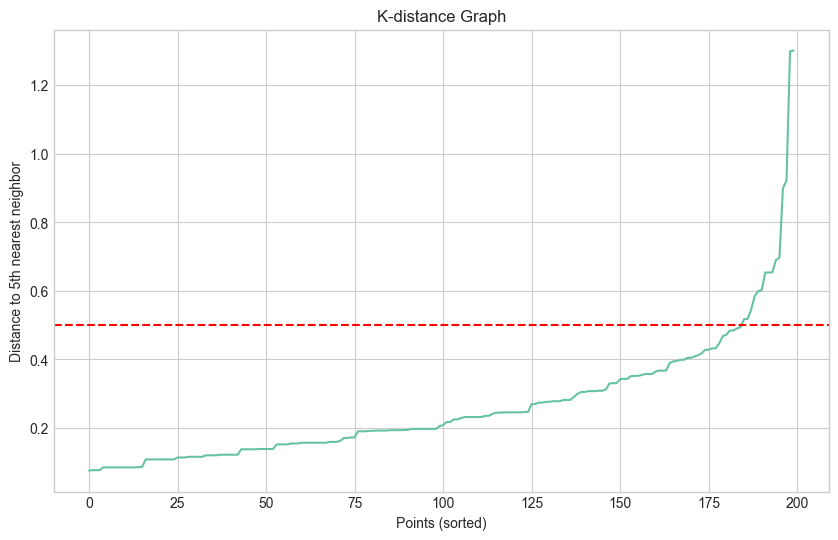

In [15]:
# Sort and plot the distances to the 5th nearest neighbor
distances = np.sort(distances[:, 4])

plt.figure(figsize=(10, 6))
plt.plot(range(len(distances)), distances)
plt.xlabel('Points (sorted)')
plt.ylabel('Distance to 5th nearest neighbor')
plt.title('K-distance Graph')
plt.axhline(y=0.5, color='r', linestyle='--')  # Example threshold
plt.grid(True)
plt.show()

# Based on the k-distance graph, we choose eps=0.5
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [16]:
# Count the number of clusters and noise points
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f'DBSCAN estimated number of clusters: {n_clusters_dbscan}')
print(f'DBSCAN estimated number of noise points: {n_noise}')

DBSCAN estimated number of clusters: 2
DBSCAN estimated number of noise points: 8


In [17]:
# 5. Visualization of Clustering Results
# ====================================
def plot_clusters(X, labels, title):
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
    plt.colorbar(scatter, label='Cluster')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.title(title)
    plt.grid(True)
    plt.show()

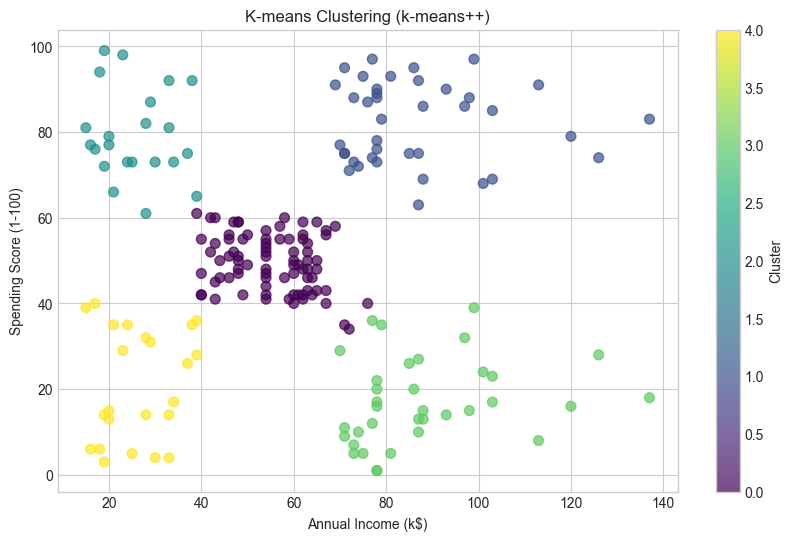

In [18]:
# 5.1 Visualize K-means results
plot_clusters(X, kmeans_labels, 'K-means Clustering (k-means++)')

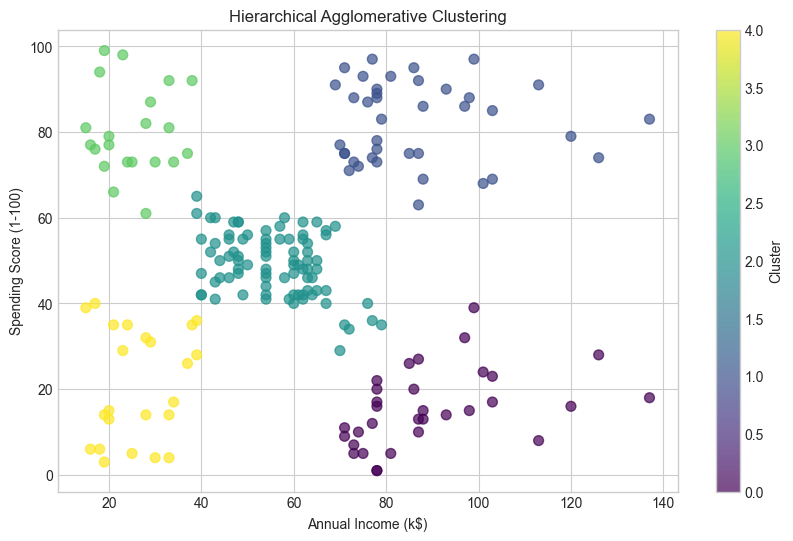

In [19]:
# 5.2 Visualize Hierarchical results
plot_clusters(X, hierarchical_labels, 'Hierarchical Agglomerative Clustering')

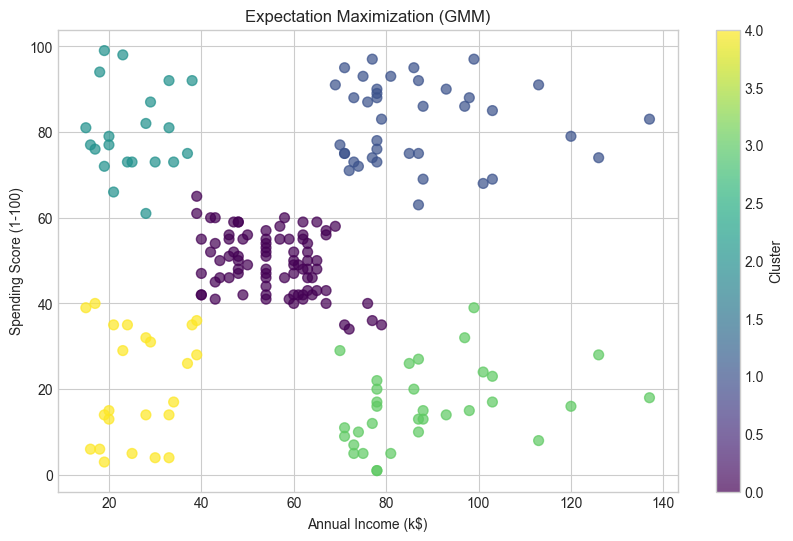

In [20]:
# 5.3 Visualize GMM (EM) results
plot_clusters(X, gmm_labels, 'Expectation Maximization (GMM)')

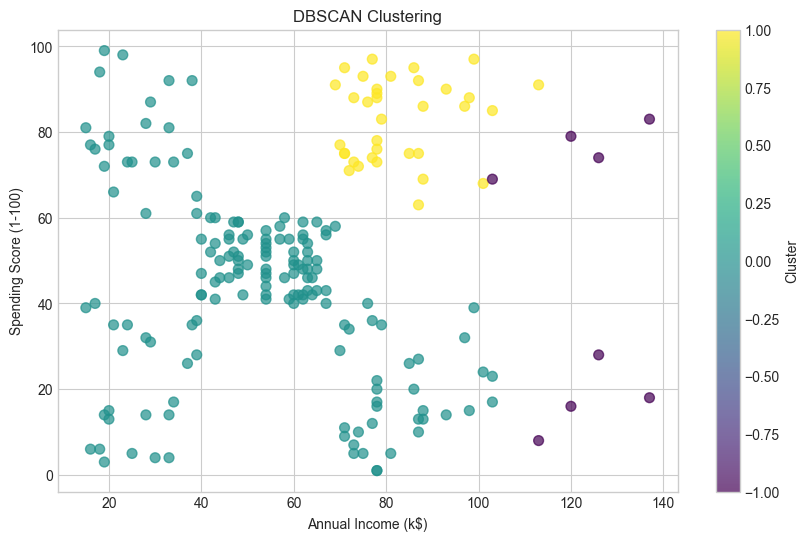

In [21]:
# 5.4 Visualize DBSCAN results
plot_clusters(X, dbscan_labels, 'DBSCAN Clustering')

In [22]:
# 6. Evaluation Metrics for Clustering
# ==================================

def evaluate_clustering(X, labels, algorithm_name):
    # Compute silhouette score (excluding noise points for DBSCAN)
    if -1 in labels:
        # Mask for non-noise points
        mask = labels != -1
        sil_score = silhouette_score(X[mask], labels[mask]) if sum(mask) > 1 else np.nan
        ch_score = calinski_harabasz_score(X[mask], labels[mask]) if sum(mask) > 1 else np.nan
        db_score = davies_bouldin_score(X[mask], labels[mask]) if sum(mask) > 1 else np.nan
    else:
        sil_score = silhouette_score(X, labels)
        ch_score = calinski_harabasz_score(X, labels)
        db_score = davies_bouldin_score(X, labels)
    
    return {
        'Algorithm': algorithm_name,
        'Silhouette Score': sil_score,
        'Calinski-Harabasz Index': ch_score,
        'Davies-Bouldin Index': db_score
    }

In [23]:
# Evaluate all algorithms
evaluation_results = []

# K-means evaluation
evaluation_results.append(evaluate_clustering(X_scaled, kmeans_labels, 'K-means (k-means++)'))

# Hierarchical evaluation
evaluation_results.append(evaluate_clustering(X_scaled, hierarchical_labels, 'Hierarchical (Ward)'))

# GMM (EM) evaluation
evaluation_results.append(evaluate_clustering(X_scaled, gmm_labels, 'EM (GMM)'))

# DBSCAN evaluation
evaluation_results.append(evaluate_clustering(X_scaled, dbscan_labels, 'DBSCAN'))

# Create a DataFrame with the results
evaluation_df = pd.DataFrame(evaluation_results)
display(evaluation_df)

,Algorithm,Silhouette Score,Calinski-Harabasz Index,Davies-Bouldin Index
0,K-means (k-means++),0.554657,248.649320,0.572236
1,Hierarchical (Ward),0.553809,244.410326,0.577862
2,EM (GMM),0.553689,244.940197,0.576010
3,DBSCAN,0.387558,85.389706,0.788864


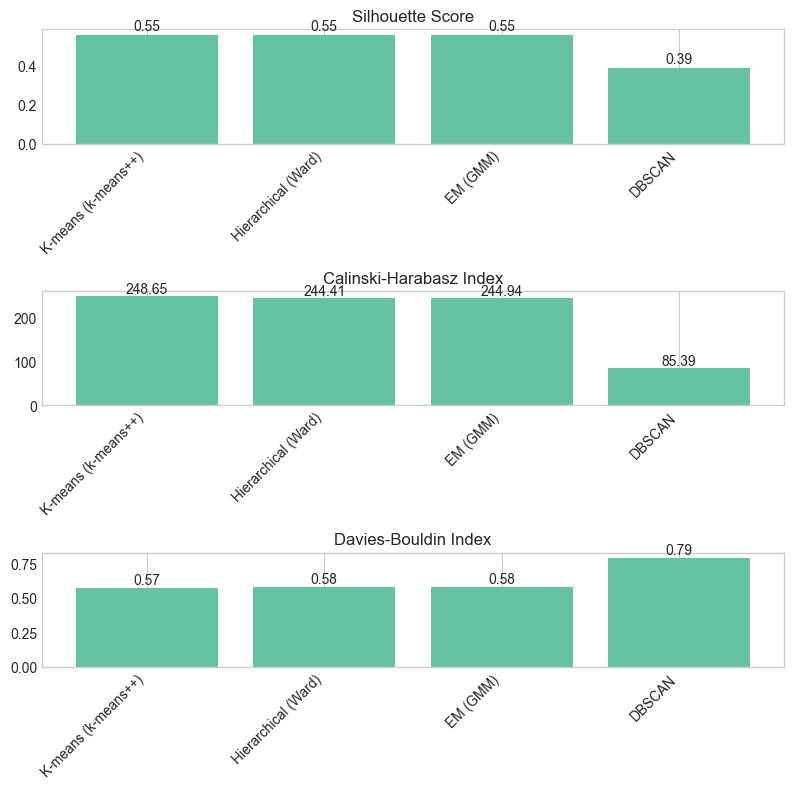

In [24]:
# 7. Visualization of Evaluation Metrics
# ===================================
# Higher Silhouette and Calinski-Harabasz scores are better
# Lower Davies-Bouldin scores are better

metrics = ['Silhouette Score', 'Calinski-Harabasz Index', 'Davies-Bouldin Index']
algorithms = evaluation_df['Algorithm'].tolist()

fig, axes = plt.subplots(3, 1, figsize=(8, 8))

for i, metric in enumerate(metrics):
    ax = axes[i]
    bars = ax.bar(algorithms, evaluation_df[metric])
    ax.set_title(metric)
    ax.set_xticklabels(algorithms, rotation=45, ha='right')
    ax.grid(axis='y')
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [25]:
# 8. Detailed Comparison and Analysis
# =================================

# Create a comprehensive comparison table
comparison_table = pd.DataFrame({
    'Algorithm': ['K-means (k-means++)', 'Hierarchical Clustering', 'Expectation Maximization (GMM)', 'DBSCAN'],
    'Description': [
        'Partitional clustering that minimizes within-cluster variance',
        'Builds a hierarchy of clusters by merging or splitting',
        'Probabilistic model that assumes data points are generated from a mixture of Gaussian distributions',
        'Density-based clustering that groups points in high-density regions'
    ],
    'Strengths': [
        'Simple, fast, works well with globular clusters',
        'Creates hierarchical representation, no need to specify clusters in advance',
        'Flexible, assigns probability of cluster membership, handles overlapping clusters',
        'Can find arbitrarily shaped clusters, identifies noise, no need to specify cluster count'
    ],
    'Weaknesses': [
        'Needs number of clusters in advance, sensitive to initialization, assumes spherical clusters',
        'Computationally expensive O(n²), difficult to scale to large datasets',
        'Sensitive to initialization, assumes Gaussian distributions, can converge to local optima',
        'Sensitive to parameters (eps, min_samples), struggles with varying densities'
    ],
    'Best Use Cases': [
        'Well-separated, equally sized, spherical clusters',
        'Hierarchical structures, smaller datasets, when cluster hierarchy matters',
        'Overlapping clusters, probabilistic assignments needed',
        'Irregular shapes, outlier detection, unknown number of clusters'
    ],
    'Number of Clusters': [
        n_clusters,
        n_clusters,
        n_clusters,
        f'{n_clusters_dbscan} (found automatically)'
    ]
})

display(comparison_table)

,Algorithm,Description,Strengths,Weaknesses,Best Use Cases,Number of Clusters
0,K-means (k-means++),Partitional clustering that minimizes within-c...,"Simple, fast, works well with globular clusters","Needs number of clusters in advance, sensitive...","Well-separated, equally sized, spherical clusters",5
1,Hierarchical Clustering,Builds a hierarchy of clusters by merging or s...,"Creates hierarchical representation, no need t...","Computationally expensive O(n²), difficult to ...","Hierarchical structures, smaller datasets, whe...",5
2,Expectation Maximization (GMM),Probabilistic model that assumes data points a...,"Flexible, assigns probability of cluster membe...","Sensitive to initialization, assumes Gaussian ...","Overlapping clusters, probabilistic assignment...",5
3,DBSCAN,Density-based clustering that groups points in...,"Can find arbitrarily shaped clusters, identifi...","Sensitive to parameters (eps, min_samples), st...","Irregular shapes, outlier detection, unknown n...",2 (found automatically)


In [26]:
# 9. Conclusion
# ============

# Let's add a conclusion based on the evaluation metrics
best_silhouette = evaluation_df.loc[evaluation_df['Silhouette Score'].idxmax()]
best_ch = evaluation_df.loc[evaluation_df['Calinski-Harabasz Index'].idxmax()]
best_db = evaluation_df.loc[evaluation_df['Davies-Bouldin Index'].idxmin()]

print("Best Algorithm by Silhouette Score:", best_silhouette['Algorithm'])
print("Best Algorithm by Calinski-Harabasz Index:", best_ch['Algorithm'])
print("Best Algorithm by Davies-Bouldin Index:", best_db['Algorithm'])

# Final observations
print("\nFinal Observations:")
print("1. For this mall customer dataset with Annual Income and Spending Score attributes:")
print(f"   - {best_silhouette['Algorithm']} provides the best cluster separation (Silhouette Score: {best_silhouette['Silhouette Score']:.2f})")
print(f"   - {best_ch['Algorithm']} provides the most dense and well-separated clusters (CH Index: {best_ch['Calinski-Harabasz Index']:.2f})")
print(f"   - {best_db['Algorithm']} has the lowest within-cluster to between-cluster ratio (DB Index: {best_db['Davies-Bouldin Index']:.2f})")

print("\n2. DBSCAN automatically identified outliers and found an optimal number of clusters without manual specification")
print("\n3. Hierarchical clustering provided a dendrogram visualization that helps understand the structure of the data")
print("\n4. Different algorithms can identify different patterns in the same dataset, highlighting the importance of algorithm selection")

Best Algorithm by Silhouette Score: K-means (k-means++)
Best Algorithm by Calinski-Harabasz Index: K-means (k-means++)
Best Algorithm by Davies-Bouldin Index: K-means (k-means++)

Final Observations:
1. For this mall customer dataset with Annual Income and Spending Score attributes:
   - K-means (k-means++) provides the best cluster separation (Silhouette Score: 0.55)
   - K-means (k-means++) provides the most dense and well-separated clusters (CH Index: 248.65)
   - K-means (k-means++) has the lowest within-cluster to between-cluster ratio (DB Index: 0.57)

2. DBSCAN automatically identified outliers and found an optimal number of clusters without manual specification

3. Hierarchical clustering provided a dendrogram visualization that helps understand the structure of the data

4. Different algorithms can identify different patterns in the same dataset, highlighting the importance of algorithm selection
